# Agregando fuentes puntuales a un mapa de CMB
### Jeff McMahon  y Renée Hložek. Traducción por Cristian Vargas

En el cuadernillo anterior simulamos solamente el fondo de radiación cósmica en el cielo. Ahora queremos agregar fuentes a estos mapas (cosas que están en frente a este fondo). Empezaremos por leer los parametros definidos en el cuadernillo anterior.

In [1]:
import numpy as np
import matplotlib
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import astropy.io.fits as fits


%matplotlib inline

#%cd /Tu/carpeta/de/trabajo

import constantes as cs # modulo de constantes

from cmb_modulos import * # modulo de funciones 
N = cs.N
c_min = cs.c_min
c_max = cs.c_max
X_ancho =cs.X_ancho
Y_ancho = cs.Y_ancho
tamaño_pix = cs.tamaño_pix

## Section 1.3: Mapa de Fuentes Puntuales

Las fuentes puntuales u objetos no resueltos aparecen en los mapas de fondo de radiación cósmica por varios tipos de objetos astrofísicos, incluyendo galaxias de nucleo activo, galaxias de polvo que forman estrellas, y las más brillantes aparecen por efecto de lente gravitacional, es decir fueron magnificadas por otras galaxias masivas que están justo en frente. Todos estos objetos son interesantes por si mismos. Para el proposito de nuestro cielo simulado, aproximaremos estas poblaciones como una combinación de una distribución tenue de fuentes que sigue una distribución de brillo tipo Poisson y un pequeño número de fuentes muy brillantes con un número de cuentas que cae exponencialmente. Esto se aproxima a la distribución de fuentes débiles y brillantes vistas en mapas CMB reales. Los parámetros de las fuentes se eligieron apróximadamente para que se parezcan a los mapas reales a 150 GHz. Números de cuentas reales han sido publicados y pueden ser consultados en caso de querer hacer simulaciones más realistas. Publicaciones cientificas además detallan como escalan estos números de cuentas dependiendo de la frecuencia. En general las galaxias de polvo se hacen más brillantes a frecuencias más altas, mientras que las galaxias activas se hacen más tenues a frecuencias más altas. Este tipo de comportamiento debe ser incluido en análisis de multi-frecuencia como también en las simulaciones.

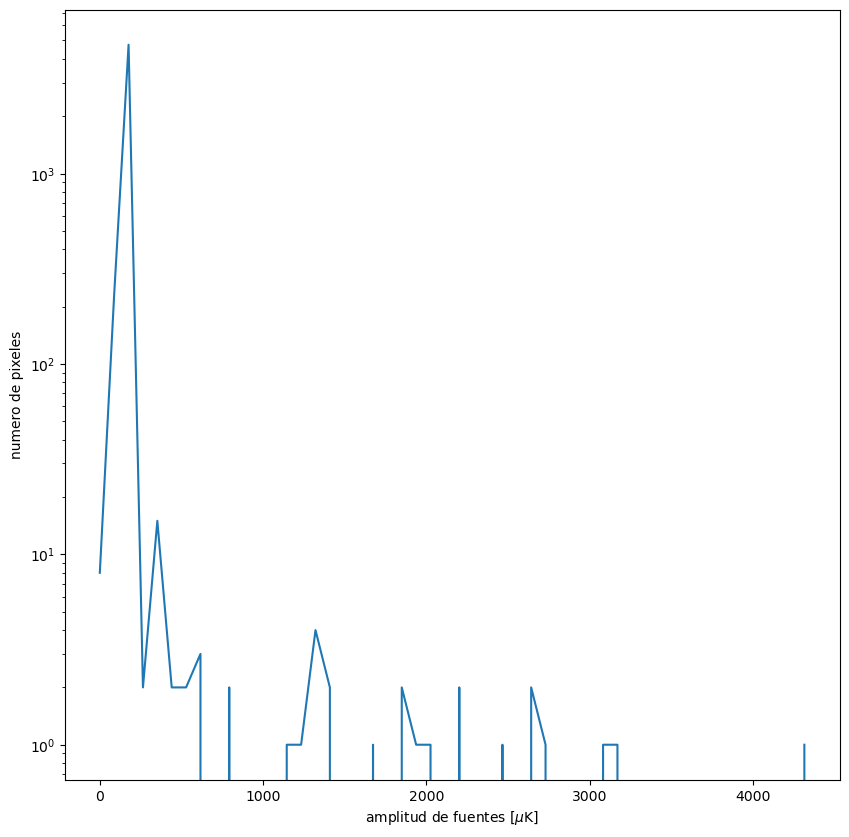

promedio del mapa: 1.008305821351078 , media cuadrática (rms) del mapa: 17.383633997130364


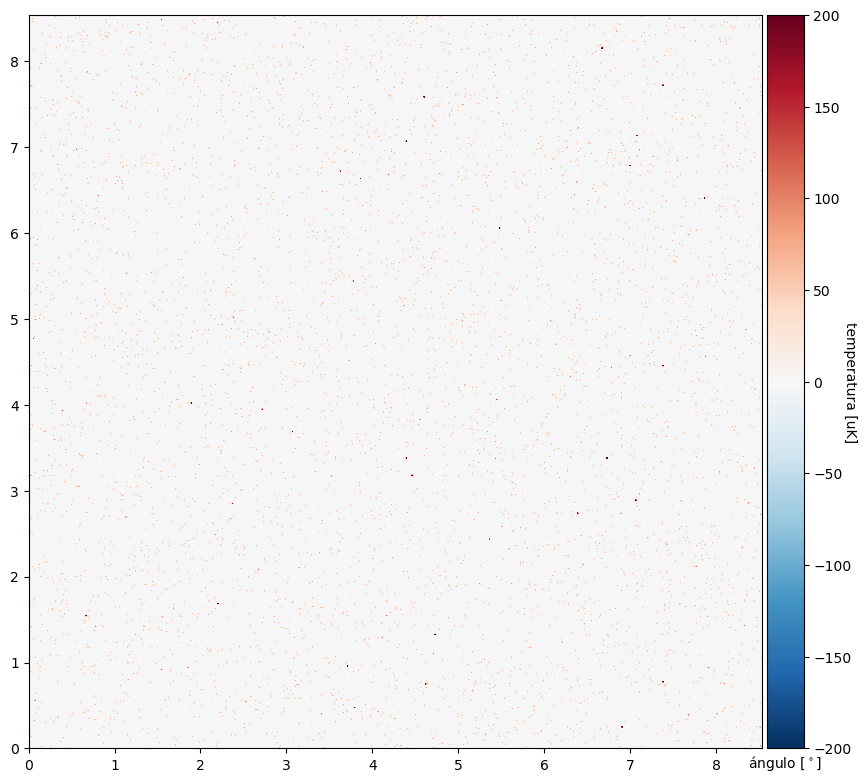

In [2]:
### Parametros para configurar la distribución Poisson de fuentes puntuales.

Numero_de_Fuentes  = 5000.       #Numero de fuentes tenues
Amplitud_de_Fuentes = 200.       #Amplitud de las fuentes tenues

Numero_de_Fuentes_EX = 50.       #Numero de fuentes brillantes
Amplitud_de_Fuentes_EX = 1000.   #Amplitud de las fuentes brillantes

def componente_Poisson(N,tamaño_pix,Numero_de_Fuentes,Amplitud_de_Fuentes):
    "crea un mapa simplificado de fuentes puntuales distribuido por Poisson"
    "toma en cuenta el numero de pixeles, el tamaño de los pixeles y el numero y amplitud de las fuentes"
    MapaFP = np.zeros([int(N),int(N)]) #Iniciamos el Mapa de Fuentes Puntuales como ceros
    i = 0.
    # vamos añadiendo fuentes con amplitud dada por la distribución de Poisson alrededor de la amplitud promedio
    while (i < Numero_de_Fuentes):
        pix_x = int(N*np.random.rand())
        pix_y = int(N*np.random.rand()) 
        MapaFP[pix_x,pix_y] += np.random.poisson(Amplitud_de_Fuentes)
        i = i + 1
    return(MapaFP)    
  ############################### 

def componente_Exponencial(N,tamaño_pix,Numero_de_Fuentes_EX,Amplitud_de_Fuentes_EX):
    "crea un mapa simplificado de fuentes puntuales distribuidas exponencialmente"
    MapaFP = np.zeros([int(N),int(N)])
    i = 0.
    # vamos añadiendo fuentes con amplitud dada por la distribución exponencial alrededor de la amplitud promedio
    while (i < Numero_de_Fuentes_EX):
        pix_x = int(N*np.random.rand()) 
        pix_y = int(N*np.random.rand()) 
        MapaFP[pix_x,pix_y] += np.random.exponential(Amplitud_de_Fuentes_EX)
        i = i + 1
    return(MapaFP)    
  ############################### 

## Creamos el mapa de fuentes puntuales sumando ambas componentes

MapaFP = componente_Poisson(N,tamaño_pix,Numero_de_Fuentes,Amplitud_de_Fuentes) 
MapaFP += componente_Exponencial(N,tamaño_pix,Numero_de_Fuentes_EX,Amplitud_de_Fuentes_EX)

hist,bin_bordes = np.histogram(MapaFP,bins = 50,range=[.001,MapaFP.max()])
plt.figure(figsize=(10,10))
plt.semilogy(bin_bordes[0:-1],hist)
plt.xlabel('amplitud de fuentes [$\mu$K]')
plt.ylabel('numero de pixeles')
plt.show()

p=Graficar_Mapa_CMB(MapaFP,c_min/2,c_max/2,X_ancho,Y_ancho)    

Este grafico superior muestra el histograma de brillo de los pixeles en el mapa de fuentes. El grafico inferior muestra el mapa de fuentes puntuales que hemos simulado

<font color='red'>EJERCICIO: </font> Grafica un histograma de la componente Poisson y otro de la componente exponencial de fuentes. ¿Cómo se diferencian estas dos distribuciones?




In [3]:
## Tu codigo va aquí

Tu discusión va aquí

## Section 1.4: Mapa  SZ

Los cúmulos de galaxias crean una sutil distorsión en los mapas CMB que es más evidente en escalas de minutos de arco. Mientras que los cúmulos de galaxias llevan su nombre por ser una aglomeración de galaxias unidas por gravedad, las galaxias en si solo representan una pequeña fracción de la materia dentro del cúmulo. Aproximadamente 80% de los bariones no están contenidos dentro de las galaxias, sino que existen como una nube de gas unida dentro del pozo de potencial gravitacional creado por un halo de materia oscura que transporta la gran mayoría de masa del cúmulo. Dentro de este pozo, el gas diluido se ioniza y calienta a temperaturas de millones de grados Kelvin. 

Ocasionalmente, un fotón del CMB interactúa con uno de los electrones calientes en este gas ionizado. Esta interacción (dispersión Compton inversa) le da al fotón CMB un impulso de energía. Los cálculos detallados muestran que este efecto (efecto Sunyaev-Zel'dovich o SZ) conduce a una disminución de la potencia en frecuencias por debajo del "nulo" a 220 GHz y potencia adicional en frecuencias más altas. Este resultado es independiente del corrimiento al rojo. Por lo tanto, el efecto SZ proporciona una forma de detectar cúmulos de galaxias y estudiar la densidad de electrones dentro del cúmulo. La señal SZ es un trazador razonablemente bueno de la masa del cúmulo.

Para estas simulaciones, tratamos a cada cúmulo como si tuviera un "perfil beta" de brillo y ajustamos cada grupo para que tenga un tamaño angular idéntico. Trazamos la distribución de temperaturas a partir de la distribución exponencial ya que esto simplifica el código y reduce la dependencia con librerias externas. Para simulaciones más precisas, un rango de tamaños de cúmulos debe ser usado, una distribución de formas (con perfiles más precisos) se debe considerar, y el número de cúmulos debe estar en función de la masa y corrimiento al rojo de tal forma que coincida con mediciones de la función de masa de cúmulos.


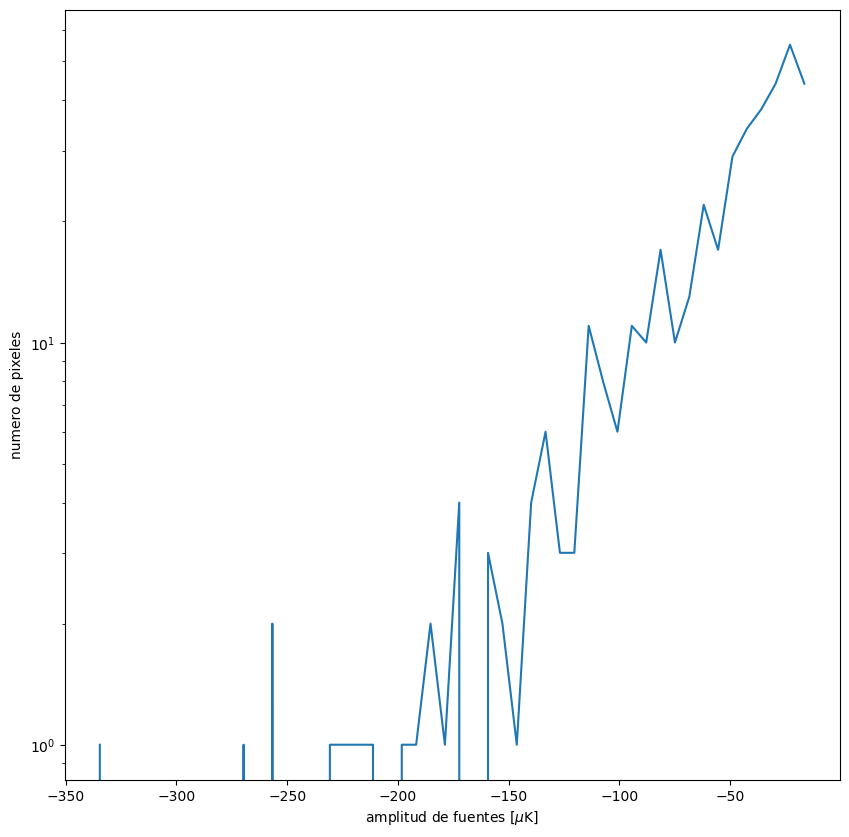

promedio del mapa: -12.899891654099301 , media cuadrática (rms) del mapa: 6.629271355797227


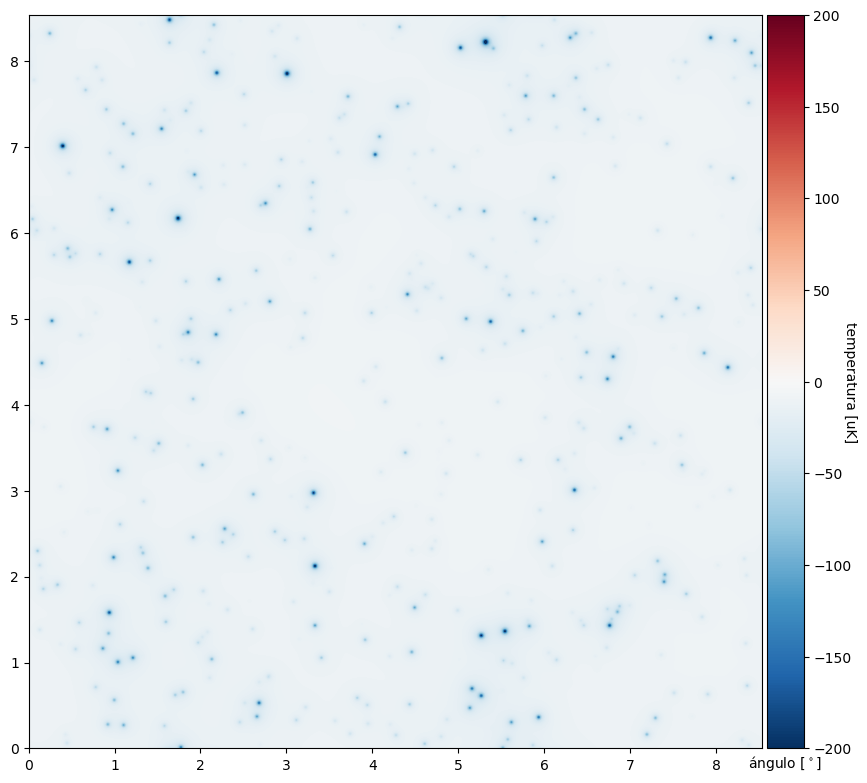

In [4]:
### parametros para configurar las fuentes SZ

Numero_de_cumulos_SZ  = 500
Amplitud_promedio_de_cumulos_SZ = 50
SZ_beta = 0.86
SZ_Theta_central = 1.0

def componente_fuentes_SZ(N,tamaño_pix,Numero_de_cumulos_SZ,Amplitud_promedio_de_cumulos_SZ,
                          SZ_beta,SZ_Theta_central,hacer_grafico):
    "crea un mapa simulado de SZ"
    N=int(N)
    MapaSZ = np.zeros([N,N]) 
    catSZ = np.zeros([3,Numero_de_cumulos_SZ]) ## catalogo de fuentes SZ: X, Y, amplitud
    # crea una distribución de fuentes puntuales con amplitud variable
    i = 0
    while (i < Numero_de_cumulos_SZ):
        pix_x = int(N*np.random.rand())
        pix_y = int(N*np.random.rand())
        pix_amplitud = np.random.exponential(Amplitud_promedio_de_cumulos_SZ)*(-1.)
        catSZ[0,i] = pix_x
        catSZ[1,i] = pix_y
        catSZ[2,i] = pix_amplitud
        MapaSZ[pix_x,pix_y] += pix_amplitud
        i = i + 1
    if (hacer_grafico):
        hist,bin_bordes = np.histogram(MapaSZ,bins = 50,range=[MapaSZ.min(),-10])
        plt.figure(figsize=(10,10))
        plt.semilogy(bin_bordes[0:-1],hist)
        plt.xlabel('amplitud de fuentes [$\mu$K]')
        plt.ylabel('numero de pixeles')
        plt.show()
    
    # crea una función beta
    beta = funcion_beta(int(N),tamaño_pix,SZ_beta,SZ_Theta_central)
    
    
    # convoluciona la función beta con las fuentes puntuales para obtener el mapa SZ
    # NOTA: puedes volver a la introducción para practicar con convoluciones!
    TF_beta = np.fft.fft2(np.fft.fftshift(beta))    # Transformada de Fourier de la función beta
    TF_MapaSZ = np.fft.fft2(np.fft.fftshift(MapaSZ))  # Transformada de Fourier del mapa puntual SZ
    MapaSZ = np.fft.fftshift(np.real(np.fft.ifft2(TF_beta*TF_MapaSZ))) # Convolución 
    
    # retorna el mapa SZ, junto con el catalogo
    return(MapaSZ,catSZ)    
  ############################### 

def funcion_beta(N,tamaño_pix,SZ_beta,SZ_Theta_central):
  # crea la función beta

    N=int(N)
    unos = np.ones(N)
    indices  = (np.arange(N)+.5 - N/2.) * tamaño_pix
    X = np.outer(unos,indices)
    Y = np.transpose(X)
    # calcula la misma función de espacio-real R que en el caso de FP
    R = np.sqrt(X**2. + Y**2.)
    
    beta = (1 + (R/SZ_Theta_central)**2.)**((1-3.*SZ_beta)/2.)

    # retorna el mapa de función beta
    return(beta)
  ############################### 
    
## crea un mapa de fuentes puntuales 

MapaSZ,catSZ = componente_fuentes_SZ(N,tamaño_pix,Numero_de_cumulos_SZ,Amplitud_promedio_de_cumulos_SZ,
                                     SZ_beta,SZ_Theta_central,True)

p=Graficar_Mapa_CMB(MapaSZ,c_min/2,c_max/2,X_ancho,Y_ancho)

El grafico superior muestra el histograma de decrementos-SZ de nuestro mapa SZ. El grafico inferior muestra el mapa SZ simulado. 

La frecuencia de este mapa es 150 GHz. ¿Cómo podrías saber la frecuencia del mapa solo mirando el codigo de arriba?


<font color='red'>EJERCICIO: </font>  En realidad los radios de los cúmulos varían entre cúmulo y cúmulo. Como referencia, el radio depende del corrimiento al rojo y la masa. El número de cúmulos en función de la masa y el corrimiento al rojo se denomina "función de masa" del cúmulo, y es sensible a los parámetros cosmológicos.

Para aumentar el realismo de nuestras simulaciones, divide la muestra de cúmulos en una muestra con radios extremadamente grandes (1 solo cumulo con un radio de 30 minutos de arco, similar al cúmulo más grande del cielo llamado cúmulo Coma), radios grandes (10%) de cúmulos con 5 minutos de arco, radios medianos (30%) con 2 minutos de arco, y radio pequeños (60%) con 0.5 minutos de arco de radio.


In [5]:
# Tu codigo va aquí

Comenta si tu mapa parece razonable o no. Explica también por qué (dado el algoritmo que estamos usando) no dibujamos el radio del cúmulo a partir de una distribución continua.

## 1.5 Mapa de cielo completo

El mapa del cielo es una combinación de la anisotropía CMB, un mapa de fuentes puntuales y un mapa SZ. En un apéndice agregamos el impacto de la lente CMB.

promedio del mapa: -24.297962188915854 , media cuadrática (rms) del mapa: 94.86948870885617


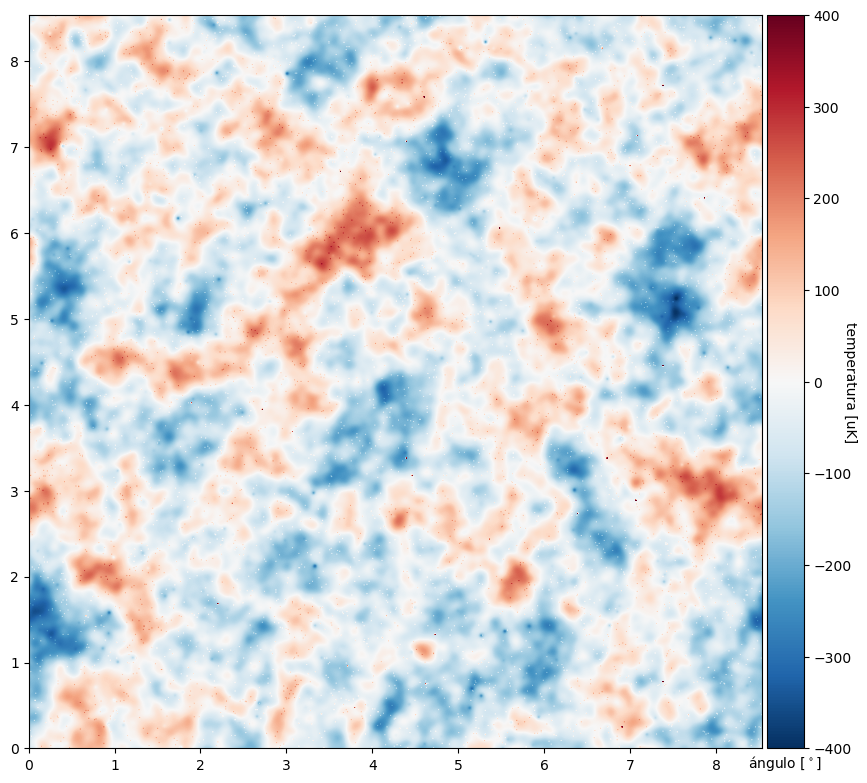

In [6]:
## rehace el mapa CMB de la sección anterior
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.dat", usecols=(0, 1), unpack=True) 
CMB_T = crear_mapa_CMB_T(N,tamaño_pix,ell,DlTT)

## suma todos los componentes juntos
mapa_total = CMB_T + MapaFP + MapaSZ

p=Graficar_Mapa_CMB(mapa_total,c_min,c_max,X_ancho,Y_ancho)

Este gráfico muestra nuestro mapa simulado que incluye CMB, fuentes puntuales y señales de cúmulos SZ. Tener en cuenta que las fuentes parecen más brillantes que lo que vimos en las observaciones reales. Esto no es un error, lo veremos despúes al tener en cuenta el haz del telescopio